Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score
import tensorflow as tf
import imageio
import pylab

In [2]:
rng = np.random.RandomState(128)

Setting directories

In [3]:
root_dir = os.path.abspath('C:/Users/Anagha Rumade/Documents/Python Scripts/TensorFlow')
Images_dir = os.path.join(root_dir, 'Images')

print(os.path.exists(root_dir))
print(os.path.exists(Images_dir))

True
True


Reading the training file

In [4]:
train_data_labels = pd.read_csv(root_dir + '/train.csv') 

In [5]:
train_data_labels.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


Taking a look at one of the input images

In [6]:
img = rng.choice(train_data_labels.filename)

In [7]:
filepath = os.path.join(Images_dir, 'train', img)

In [8]:
image = imageio.imread(filepath)

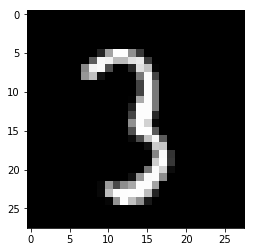

In [9]:
pylab.imshow(image)
pylab.show()

Stacking all the Input Images in a numpy array

In [10]:
%%time
all_images = []
for img_name in train_data_labels.filename:
    filepath = os.path.join(Images_dir, 'train', img_name)
    image = imageio.imread(filepath)
    image = image.astype('float32')
    all_images.append(image)

Wall time: 1min 22s


In [11]:
%%time
train_x = np.stack(all_images)

Wall time: 2.05 s


Splitting the data into training and validation sets

In [12]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_data_labels[:split_size], train_data_labels[split_size:]

Setting all Variables

In [13]:
#Number of Neurons in every layer
num_neurons_input = 28*28
num_neurons_output = 10
num_neurons_hidden = 500

In [14]:
#Placeholders
x = tf.placeholder(tf.float32, [None, num_neurons_input])
y = tf.placeholder(tf.float32, [None, num_neurons_output])

In [15]:
#Setting variables
epoch = 5
batch_size = 128
learning_rate = 0.01

In [16]:
weights = {
    'hidden': tf.Variable(tf.random_normal([num_neurons_input, num_neurons_hidden])),
    'output': tf.Variable(tf.random_normal([num_neurons_hidden, num_neurons_output]))
}

biases = {
    'hidden': tf.Variable(tf.random_normal([num_neurons_hidden])),
    'output': tf.Variable(tf.random_normal([num_neurons_output]))
}

Building Neural Networks Computational Graph

In [17]:
hidden_layer = tf.add(tf.matmul(x, weights['hidden']), biases['hidden'])
hidden_layer = tf.nn.relu(hidden_layer)

In [18]:
output_layer = tf.matmul(hidden_layer, weights['output']) + biases['output']

In [19]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [20]:
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, ).minimize(cost)

Useful functions

In [21]:
def dense_to_one_hot(labels_dense, num_classes=10):
    """Convert class labels from scalars to one-hot vectors"""
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    
    return labels_one_hot

In [22]:
def preproc(batch_normalize):
    batch_temp = batch_normalize/batch_normalize.max()
    return batch_temp

In [23]:
def batch_creator(batch_size, dataset_length, dataset_name):
    """Create batch with random samples and return appropriate format"""
    batch_mask = rng.choice(dataset_length, batch_size)
    
    batch_x = eval(dataset_name + '_x')[[batch_mask]].reshape(-1, num_neurons_input)
    batch_x = preproc(batch_x)
    
    batch_y = eval(dataset_name + '_y').ix[batch_mask, 'label'].values
    batch_y = dense_to_one_hot(batch_y)
        
    return batch_x, batch_y

In [24]:
init = tf.global_variables_initializer()

Creating a session and running it

In [1]:
#Initializing the session
with tf.Session() as sess:
    sess.run(init)
    
    for epoc in range(epoch):
        avg_cost = 0
        all_batches = int(train_x.shape[0]/batch_size)
        for batch in range(all_batches):
            batch_x, batch_y = batch_creator(batch_size, train_x.shape[0], 'train')
            _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
            avg_cost += c/all_batches

        print('Epoch:' + (epoch+1) + ' cost: ' + avg_cost)

    print('Training Complete')

NameError: name 'tf' is not defined